In [16]:
#Portfolio Return
#Exercise 1:

'''Use your favorite finance textbook and online resources in researching the constraint summation wi=1.
What would it mean for a portfolio if summation wi=2. Answer the same question but now for summation wi=0
. Initiate a discussion in the forum explaining your understanding.'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

assets = ['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL'] # Assets for portfolio
w = np.array([0.1, 0.2, 0.1, 0.4, 0.2]) # Weights of each asset

asset_prices1 = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\M.Sc.(WQU)\\C2_Financial_Data\\M3_Portfolios_and_tick_data\\portfolio_prices.csv", index_col = "Date", parse_dates = True)

r = asset_prices1.pct_change().dropna() # Calculating daily percent returns

r.head() # Each column is r_{i}

r_port = r @ w # Creating portfolio returns
r_port.name = 'portfolio_returns'
r_port.head()

Date
2018-01-03    0.004059
2018-01-04    0.003611
2018-01-05    0.011902
2018-01-08    0.015802
2018-01-09   -0.001093
Name: portfolio_returns, dtype: float64

In [17]:
#Type of Returns
#Excercise 2

'''Create a custom function in Python that given a price array (for example asset_prices['MSFT']), 
will return the array of the arithmetic returns. You are not allowed to use any existing Python functions. 
Cross-check the results with the ones produced by using the pct_change pandas function.'''


def arithmetic_returns(price_array):
    """
    Computes arithmetic returns from a price array.
    
    Parameters:
    price_array (array-like): Sequence of asset prices
    
    Returns:
    list: Arithmetic returns (first value is None)
    """
    returns = [None]  # first return is undefined
    
    for i in range(1, len(price_array)):
        prev_price = price_array[i - 1]
        curr_price = price_array[i]
        
        ret = (curr_price - prev_price) / prev_price
        returns.append(ret)
    
    return returns


# Example price series
asset_prices = pd.DataFrame({
    'MSFT': [310, 315, 312, 318, 320]
})

# Custom function output
custom_returns = arithmetic_returns(asset_prices['MSFT'].values)

# Pandas output
pandas_returns = asset_prices['MSFT'].pct_change()

# Combine results for comparison
comparison = pd.DataFrame({
    'Price': asset_prices['MSFT'],
    'Custom_Returns': custom_returns,
    'Pandas_pct_change': pandas_returns
})

print(comparison)


   Price  Custom_Returns  Pandas_pct_change
0    310             NaN                NaN
1    315        0.016129           0.016129
2    312       -0.009524          -0.009524
3    318        0.019231           0.019231
4    320        0.006289           0.006289


In [18]:
#Excercise 3
'''Create a custom function in Python that, given a price array (for example asset_prices['MSFT']), 
will return the array of the logarithmic returns.'''

import math

def log_returns(price_array):
    """
    Computes logarithmic returns from a price array.
    
    Parameters:
    price_array (array-like): Sequence of asset prices
    
    Returns:
    list: Logarithmic returns (first value is None)
    """
    returns = [None]  # first return is undefined
    
    for i in range(1, len(price_array)):
        prev_price = price_array[i - 1]
        curr_price = price_array[i]
        
        log_ret = math.log(curr_price / prev_price)
        returns.append(log_ret)
    
    return returns

import pandas as pd

asset_prices = pd.DataFrame({
    'MSFT': [310, 315, 312, 318, 320]
})

custom_log_returns = log_returns(asset_prices['MSFT'].values)
print(custom_log_returns)


[None, 0.01600034134644112, -0.009569451016150672, 0.01904819497069441, 0.006269613013595395]


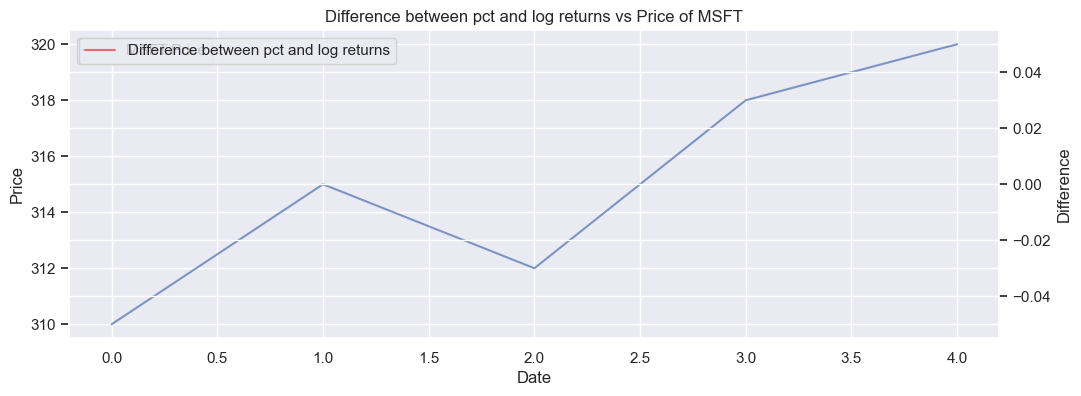

In [19]:
# Figure 1

pct_returns_msft = asset_prices['MSFT'].pct_change().dropna() # Calculating pct returns
log_returns_msft = np.log(asset_prices['MSFT'] / asset_prices['MSFT'].shift(1)).dropna() # Calculating log returns

pct_change_msft_roll_mean = pct_returns_msft.rolling(15).mean() # Rolling average of pct returns
log_returns_msft_roll_mean = log_returns_msft.rolling(15).mean() # Rolling average of log returns

fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Difference between pct and log returns vs Price of MSFT')
ax.plot(asset_prices['MSFT'], label = 'MSFT Price', alpha = 0.7)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend()

ax2 = ax.twinx()
ax2.plot((pct_change_msft_roll_mean - log_returns_msft_roll_mean), color = 'red', alpha = 0.5, label = 'Difference between pct and log returns')
ax2.set_ylabel('Difference')
ax2.legend(loc = (0.01,0.89))
plt.show()

['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA']


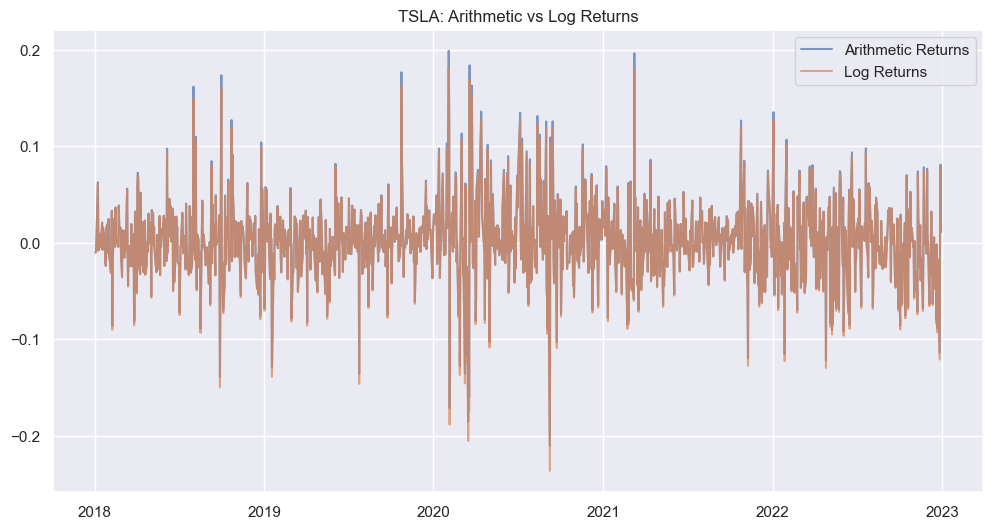

In [20]:
#Exercise 4:

'''MSFT is a low-volatility stock. Recreate Figure 1 but now use TSLA in order to illustrate clearly in 
which periods the two returns diverge.'''

print(list(asset_prices1.columns))


tsla_prices = asset_prices1['TSLA']

arith_ret = tsla_prices.pct_change()
log_ret = np.log(tsla_prices / tsla_prices.shift(1))

plt.figure(figsize=(12,6))
plt.plot(arith_ret, label='Arithmetic Returns', alpha=0.7)
plt.plot(log_ret, label='Log Returns', alpha=0.7)
plt.title('TSLA: Arithmetic vs Log Returns')
plt.legend()
plt.show()


In [21]:
#Exercise 5:

'''Argue why calculating the arithmetic weighted mean of log returns of different assets at a specific period in time 
will not give you the portfolio returns at that period.'''





'Argue why calculating the arithmetic weighted mean of log returns of different assets at a specific period in time \nwill not give you the portfolio returns at that period.'

In [24]:
#Exercise 6:

'''Using the provided asset_prices DataFrame, calculate the daily portfolio value by computing the weighted sum 
of the asset prices, using predetermined asset weights (as you would when calculating portfolio returns). 
Next, calculate the logarithmic returns of this portfolio value series. Discuss the potential use cases and advantages 
of using log returns in this context.'''

#sum of weights =1 is a necessary condition for portfolio returns calculation.
weights = {
    'MSFT': 0.4,
    'AAPL': 0.3,
    'TSLA': 0.3
}

weights_series = pd.Series(weights)

portfolio_value = asset_prices1[weights_series.index] @ weights_series

#log returns of portfolio value
portfolio_log_returns = np.log(portfolio_value / portfolio_value.shift(1))

print(portfolio_log_returns)


Date
2018-01-02         NaN
2018-01-03    0.001587
2018-01-04    0.005628
2018-01-05    0.011323
2018-01-08    0.007484
                ...   
2022-12-23   -0.003289
2022-12-27   -0.032702
2022-12-28   -0.006410
2022-12-29    0.038099
2022-12-30    0.000218
Length: 1259, dtype: float64


In [25]:
#Exercise 7:

''''Using the provided asset_prices DataFrame, calculate the cumulative return of each asset over the entire period using 
three different methods:

By using the daily percent returns array of each asset (hint: you will need to use the prod function).
By using the daily log returns.
By using the asset prices array.'''

#daily arithmetic returns
daily_returns = asset_prices1.pct_change()

cumulative_return_1 = (1 + daily_returns).prod() - 1

#daily log returns
log_returns = np.log(asset_prices1 / asset_prices.shift(1))

cumulative_return_2 = np.exp(log_returns.sum()) - 1

#prices directly
cumulative_return_3 = asset_prices1.iloc[-1] / asset_prices1.iloc[0] - 1

comparison = pd.DataFrame({
    'From Arithmetic Returns': cumulative_return_1,
    'From Log Returns': cumulative_return_2,
    'From Prices': cumulative_return_3
})

print(comparison)



       From Arithmetic Returns  From Log Returns  From Prices
AAPL                  2.172855               0.0     2.172855
AMZN                  0.412940               0.0     0.412940
GOOGL                 0.644226               0.0     0.644226
MSFT                  1.962922               0.0     1.962922
TSLA                  4.764515               0.0     4.764515


In [27]:

#Geometric and Arithmetic Mean
#Exercise 8:

'''By using the properties of the logarithm, show that the log returns are indeed continuously compounded returns.'''

percent_returns_tsla = asset_prices1['TSLA'].loc["2020-06-01":"2020-09-30"].pct_change().dropna() # Calculating daily percent returns
geom_mean_tsla_1 = ((1 + percent_returns_tsla).prod() ** (1/len(percent_returns_tsla))) - 1 # Calculating geometric mean

log_returns_tsla = np.log(asset_prices1['TSLA'].loc["2020-06-01":"2020-09-30"] / asset_prices1['TSLA'].loc["2020-06-01":"2020-09-30"].shift(1)).dropna() # Calculating daily log returns
arithmetic_mean_tsla_1 = log_returns_tsla.mean() # Calculating arithmetic mean

print("Logarithm of geometric Mean of TSLA + 1: ", np.log(geom_mean_tsla_1 + 1))
print("Arithmetic Mean of TSLA: ", arithmetic_mean_tsla_1)


Logarithm of geometric Mean of TSLA + 1:  0.010242784447195914
Arithmetic Mean of TSLA:  0.010242784447195901


In [28]:
#annualizing log returns
geom_mean_msft = ((1 + pct_returns_msft).prod() ** (1/len(pct_returns_msft))) - 1 # Calculating geometric mean
annual_pct_returns_msft = (1 + geom_mean_msft) ** 252 - 1 # Annualizing percent returns

annual_log_returns_msft = log_returns_msft.mean() * 252 # Annualizing log returns

print("Annualized pct returns of MSFT: ", annual_pct_returns_msft)
print("Annualized log returns of MSFT: ", annual_log_returns_msft)

Annualized pct returns of MSFT:  6.390297518952729
Annualized log returns of MSFT:  2.000167993818556


In [29]:
#Exercise 9:

#Calculate the annual returns for TSLA, both for percent and log returns.
percent_returns_tsla = asset_prices1['TSLA'].pct_change().dropna()
geom_mean_tsla = ((1 + percent_returns_tsla).prod() ** (1/len(percent_returns_tsla))) - 1 # Calculating geometric mean
annual_pct_returns_tsla = (1 + geom_mean_tsla) ** 252 - 1 # Annualizing percent returns

log_returns_tsla = np.log(asset_prices1['TSLA'] / asset_prices1['TSLA'].shift(1)).dropna()
annual_log_returns_tsla = log_returns_tsla.mean() * 252 # Annualizing log returns

print("Annualized pct returns of TSLA: ", annual_pct_returns_tsla)
print("Annualized log returns of TSLA: ", annual_log_returns_tsla)

Annualized pct returns of TSLA:  0.42034696436395613
Annualized log returns of TSLA:  0.35090118286811023


In [30]:
#Portfolio variance

port_var = w.T @ r.cov() @ w # Calculating portfolio variance
port_std = np.sqrt(port_var) # Calculating portfolio standard deviation

print("Portfolio variance: ", port_var)
print("Portfolio standard deviation: ", port_std)

Portfolio variance:  0.0004110714226106612
Portfolio standard deviation:  0.020274896364979554


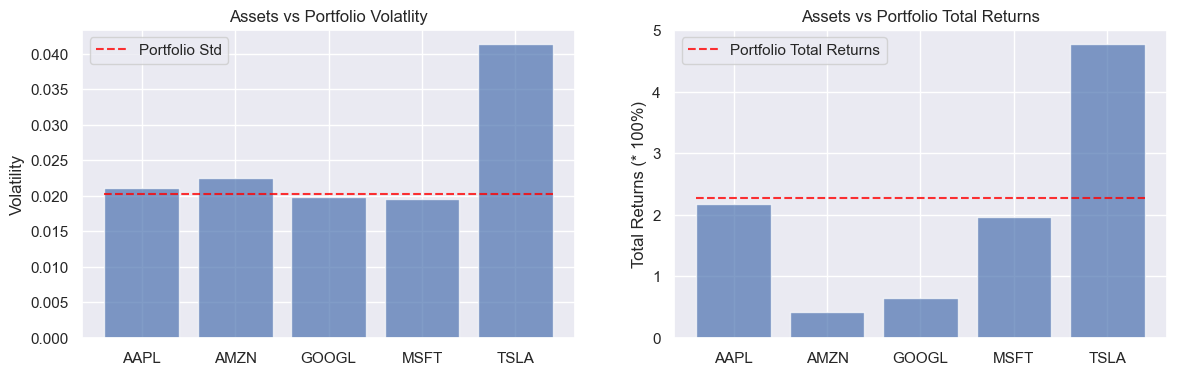

In [31]:
# Figure 2
# We will visualize the asset's std and returns vs portfolio

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,4))

ax1.bar(x = r.columns, height = r.std(), alpha = 0.7)
ax1.hlines(y = port_std, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Std")
ax1.set_title("Assets vs Portfolio Volatlity")
ax1.set_ylabel("Volatility")
ax1.legend()

ax2.bar(x = r.columns, height = (r + 1).prod() - 1, alpha = 0.7) # Make sure you can explain why the `(r + 1).prod() - 1` is the total return
ax2.hlines(y = (r_port + 1).prod() - 1, xmin = -0.4, xmax = 4.4, linestyle = "--", color = 'red', alpha = 0.8, label = "Portfolio Total Returns")
ax2.set_title("Assets vs Portfolio Total Returns")
ax2.set_ylabel("Total Returns (* 100%)")
ax2.legend()

plt.show()

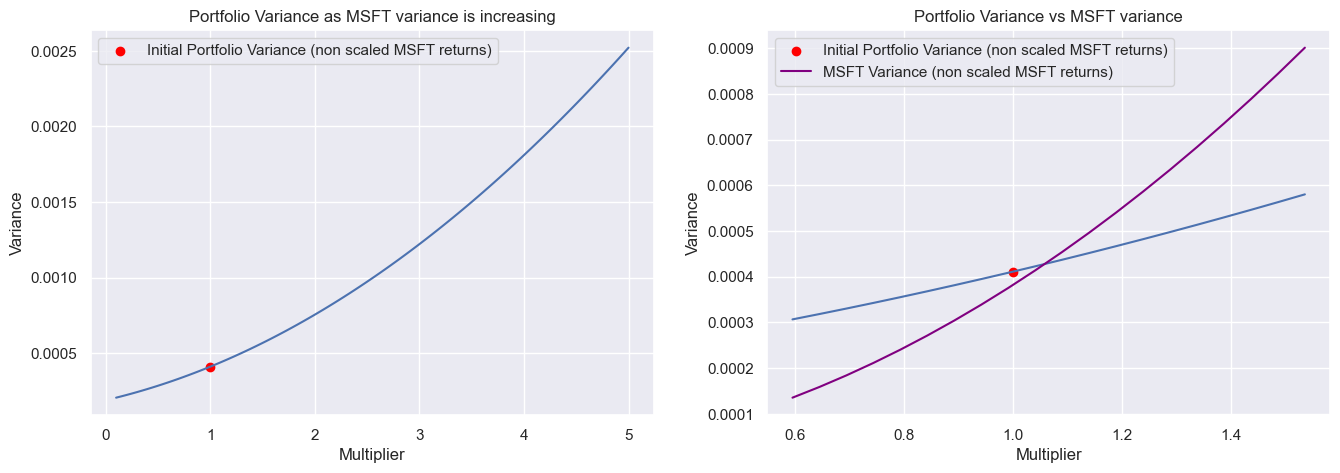

In [32]:
#Let's test the relationship of the portfolio variance with the one of a random asset, for example MSFT.
# Figure 3

multipliers = np.linspace(0.1,5,100) # Creating an array that will use to multiply the MSFT returns array.
portfolio_variances = []
msft_variances = []

for multiplier in multipliers:
  temp_returns = r * np.array([1, 1, 1, multiplier, 1]) # Multiplying MSFT returns with a number in order to scale the returns linearly, changing thus the MSFT variance.
  temp_port_variance = w.T @ temp_returns.cov() @ w # Calculating portfolio variance
  msft_variances.append((temp_returns['MSFT']).var())
  portfolio_variances.append(temp_port_variance)
  assert np.allclose(r.corr(), temp_returns.corr()) # For every new array of returns where MSFT returns are multiplied with a number, the correlations remain the same

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,5))

ax1.plot(multipliers, portfolio_variances)
ax1.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax1.set_title("Portfolio Variance as MSFT variance is increasing")
ax1.set_xlabel("Multiplier")
ax1.set_ylabel("Variance")
ax1.legend()

ax2.plot(multipliers[10:30], portfolio_variances[10:30])
ax2.scatter(1, port_var, color = 'red', label = "Initial Portfolio Variance (non scaled MSFT returns)")
ax2.plot(multipliers[10:30], msft_variances[10:30], color = 'purple', label = "MSFT Variance (non scaled MSFT returns)")
ax2.set_title("Portfolio Variance vs MSFT variance")
ax2.set_xlabel("Multiplier")
ax2.set_ylabel("Variance")
ax2.legend()

plt.show()



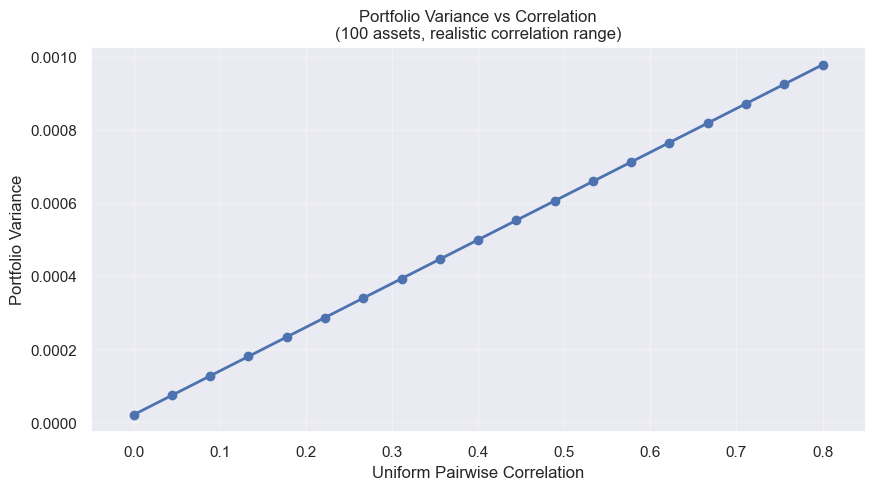

Portfolio variance increases 46.3x as correlation goes from 0.0 to 0.8


In [33]:
n_assets = 100
w = np.random.dirichlet(np.ones(n_assets), size=1)[0]

degrees_of_freedom = 8
variances = np.random.chisquare(df=degrees_of_freedom, size=n_assets)
variances = variances / np.max(variances) * 0.003
std_devs = np.sqrt(variances)
D = np.diag(std_devs)

# Start from near-zero to high positive correlations (realistic market range)
correlation_values = np.linspace(0, 0.8, 19)

corr_matrices = []
portfolio_variances = []

for corr in correlation_values:
    # Create uniform correlation matrix
    R = np.full((n_assets, n_assets), corr)
    np.fill_diagonal(R, 1)
    
    corr_matrices.append(R)
    
    # Calculate portfolio variance
    portfolio_variance = w.T @ D @ R @ D @ w
    portfolio_variances.append(portfolio_variance)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(correlation_values, portfolio_variances, 'b-o', linewidth=2, markersize=6)
plt.title("Portfolio Variance vs Correlation\n(100 assets, realistic correlation range)")
plt.xlabel("Uniform Pairwise Correlation")
plt.ylabel("Portfolio Variance")
plt.grid(True, alpha=0.3)
plt.xlim(-0.05, 0.85)

plt.show()

print(f"Portfolio variance increases {portfolio_variances[-1]/portfolio_variances[0]:.1f}x as correlation goes from {correlation_values[0]} to {correlation_values[-1]}")

In [34]:
#Exercise 10:
'''Select n>=2 stocks/bonds and construct a portfolio (select appropriate weights) using historical data such that the 
portfolio variance is 0 (or really close to 0 in order to be considered 0) and the returns are positive (far from 0). 
Present your findings in the forum. If you did not find one, present the reasons you could not find one.'''

import numpy as np

returns = asset_prices.pct_change().dropna()

cov = returns.cov()
mean_returns = returns.mean()

# try minimum variance portfolio
inv_cov = np.linalg.inv(cov)
ones = np.ones(len(mean_returns))

w_min_var = inv_cov @ ones / (ones @ inv_cov @ ones)

portfolio_var = w_min_var.T @ cov @ w_min_var
portfolio_return = w_min_var @ mean_returns
print("Portfolio Variance: ", portfolio_var)
print("Portfolio Return: ", portfolio_return)

Portfolio Variance:  0.00016740592822640516
Portfolio Return:  0.0080313250352812


C:\Users\DELL\AppData\Local\Temp\ipykernel_48536\2260725606.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_ret = expected_returns[max_ret_idx]


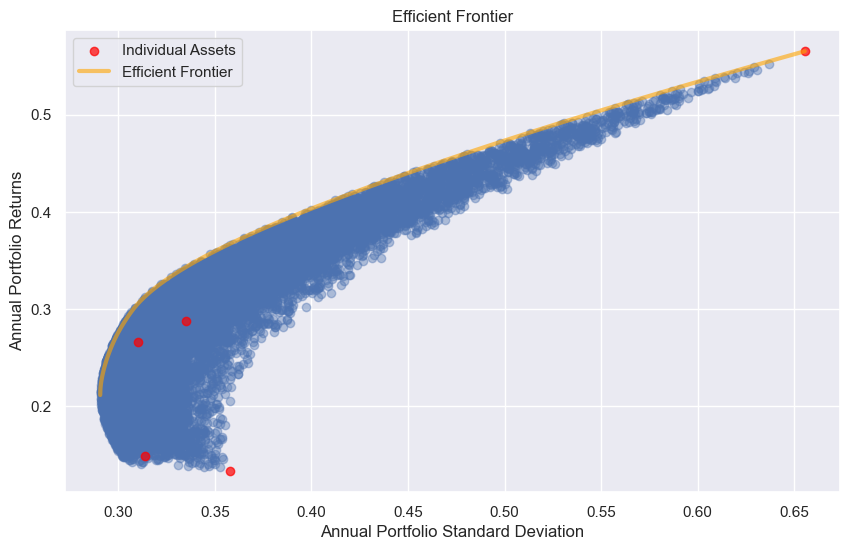

In [35]:
#Portfolio weights

from scipy.optimize import minimize

weights = np.random.dirichlet(np.ones(5)*0.7, size = 20000) # Creating 20000 sets of weights using dirichlet distribution

assert np.isclose(np.sum(weights, axis = 1), 1).all() # Check that each set of weights sum up to 1

eff_front_dict = {}
cov_matrix_ret = r.cov() * 252
expected_returns = r.mean() * 252

# Filling the eff_front_dict
for w in weights:
  port_ret = expected_returns @ w.T # Annualized percent returns as expected returns
  port_std = np.sqrt(w.T @ cov_matrix_ret @ w)
  eff_front_dict[str(list(w))] = [port_ret, port_std]

eff_frontier_dataframe = pd.DataFrame(eff_front_dict, index = ['Returns', 'Standard Deviation']).T # Storing everything in one dataframe

def get_portfolio_stats(weights, expected_returns, cov_matrix):
    port_ret = expected_returns @ weights
    port_std = np.sqrt(weights.T @ cov_matrix @ weights)
    return port_ret, port_std

def negative_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    port_ret, port_std = get_portfolio_stats(weights, expected_returns, cov_matrix)
    sharpe_ratio = (port_ret - risk_free_rate) / port_std
    return -sharpe_ratio

def minimum_variance(weights, expected_returns, cov_matrix):
    return get_portfolio_stats(weights, expected_returns, cov_matrix)[1]

def efficient_frontier_point(expected_returns, cov_matrix, target_return):
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = (
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
        {'type': 'eq', 'fun': lambda w: get_portfolio_stats(w, expected_returns, cov_matrix)[0] - target_return}
    )
    bounds = tuple((0, 1) for _ in range(n_assets))

    result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )

    return result.x

def get_efficient_frontier(expected_returns, cov_matrix, n_points=100):
    # Find the minimum variance portfolio
    n_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    min_var_result = minimize(
        minimum_variance,
        x0=np.ones(n_assets) / n_assets,
        args=args,
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    min_ret, min_std = get_portfolio_stats(min_var_result.x, expected_returns, cov_matrix)

    # Find the maximum return portfolio
    max_ret_idx = np.argmax(expected_returns)
    max_ret = expected_returns[max_ret_idx]

    # Generate points on the efficient frontier
    target_returns = np.linspace(min_ret, max_ret, n_points)
    efficient_portfolios = []

    for target_return in target_returns:
        weights = efficient_frontier_point(expected_returns, cov_matrix, target_return)
        ret, std = get_portfolio_stats(weights, expected_returns, cov_matrix)
        efficient_portfolios.append([std, ret])

    return np.array(efficient_portfolios)

# Calculate the efficient frontier points
efficient_points = get_efficient_frontier(expected_returns, cov_matrix_ret)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(x=eff_frontier_dataframe['Standard Deviation'],
           y=eff_frontier_dataframe['Returns'],
           alpha=0.4)
plt.scatter(x=r.std() * np.sqrt(252),
           y=expected_returns,
           color='red',
           label="Individual Assets",
           alpha=0.7)
plt.plot(efficient_points[:,0],
         efficient_points[:,1],
         'orange',
         linewidth=3,
         label='Efficient Frontier',
         alpha=0.6)
plt.title("Efficient Frontier")
plt.xlabel("Annual Portfolio Standard Deviation")
plt.ylabel("Annual Portfolio Returns")
plt.legend()
plt.grid(True)
plt.show()

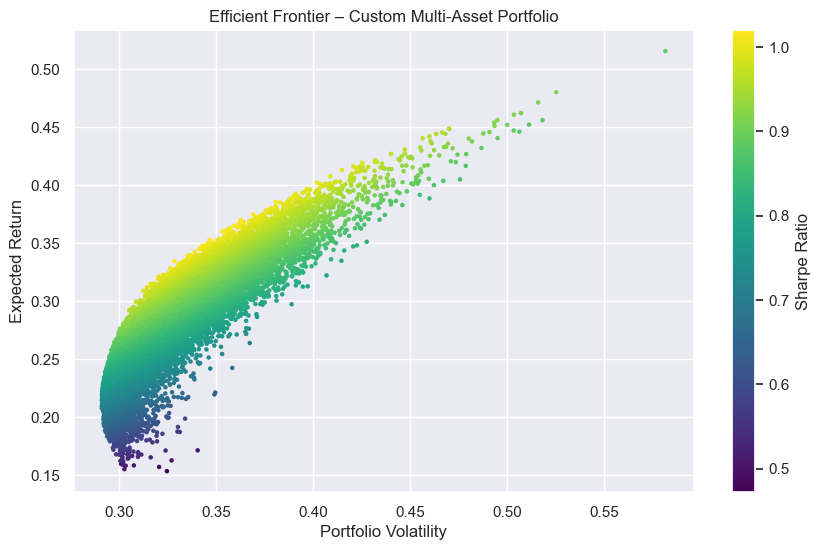

In [38]:
#Exercise 11:

'''Create your own portfolio, one to your liking: choose one or more equities, ETFs, bonds, and crypto. 
Try to include assets that are not that correlated with the rest of the portfolio (if this is possible) and also include some 
very high-volatility assets (large marketcap altcoins or newly issued ones). Use the code provided above in order to construct 
the efficient frontier. Paste the graph in the forums along with a small paragraph that lists the assets chosen.'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assets = ['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL']
prices = asset_prices1[assets]

# Daily returns
returns = prices.pct_change().dropna()

# Annualized statistics
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Portfolio simulation
n_portfolios = 20000
results = np.zeros((3, n_portfolios))

for i in range(n_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, mean_returns)
    portfolio_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    sharpe_ratio = portfolio_return / portfolio_vol

    results[0, i] = portfolio_vol
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio

# Plot
plt.figure(figsize=(10,6))
plt.scatter(results[0], results[1], c=results[2], cmap='viridis', s=5)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier – Custom Multi-Asset Portfolio')
plt.show()



In [ ]:
#Exercise 12 (Optional):

'''In the first paragraph of this notebook, we mentioned that given 
n vectors ri, in the absence of multicollinearity, it is true that dim(span{r1,r2,...,rn})=n.Otherwise, the dimension of the span
 will be lower than n. 
 This is a known result from linear algebra. Use your favorite linear algebra textbook in order to remember what multicollinearity 
 is and then argue why an investor would keep an asset in their portfolio when that asset could be written as a perfect 
 linear combination of the rest of the portfolio assets. Should the investor just omit such an asset? What is its contribution to 
 lowering portfolio variance or increasing returns? Does it give flexibility in portfolio management?'''



In [40]:
#Exercise 13:

'''Throughout this lesson, students were introduced to the correct usage of the arithmetic and geometric mean. 
In Section 2.4 Annualizing Returns, we explained how to annualize the percent and log returns if the compounding effect was needed. 
Still, when constructing the efficient frontier, we did this: expected_returns = r.mean() * 252. Why? In your answer, 
consider the context of portfolio optimization and whether we are focusing on modeling expected returns for statistical purposes 
or calculating the actual historical growth of an investment due to compounding. Discuss the implications of using the arithmetic 
mean in this context.'''

expected_returns = r.mean() * 252
print(expected_returns)


AAPL     0.287461
AMZN     0.133328
GOOGL    0.148950
MSFT     0.265836
TSLA     0.565226
dtype: float64
